## Abstract:

The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.

### Data Set Information: (Publisher)

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

#### Source:

[UCI- AI4I 2020 Predictive Maintenance Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset#)
#### Relevant Papers:

Stephan Matzka, [Explainable Artificial Intelligence for Predictive Maintenance Applications](https://ieeexplore.ieee.org/document/9253083), Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)


In [1]:
# Import required Modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
# Read Dataset
preMain = pd.read_csv('/kaggle/input/predictive-maintenance/ai4i2020.csv')
preMain.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
preMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

We have **2 objects** (Product ID, Type), and **3 floats** (Ait Temp, Process Temp, Torque), and **int** for the others.

In [4]:
preMain['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

Good, Type looks like -->
**Low:** 60%, **medium:** ~30%, **high:**  ~10% as product quality variants

In [5]:
preMain.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
# check if there is same product maybe repeat along dataset
preMain['Product ID'].nunique()

10000

In [7]:
# Check nulls
preMain.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
# check if there is same mode failures maybe repeats along dataset
modes = preMain.columns[preMain.columns.isin(['TWF','OSF'])] # we can also try with PWF/RNF

print (preMain[(preMain[modes] == 1).all(1)])

       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
5401  5402     M20261    M                302.6                    312.3   
5909  5910     H35323    H                300.7                    310.2   
8846  8847     M23706    M                297.4                    308.8   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
5401                    1454         54.8              253                1   
5909                    1364         65.3              208                1   
8846                    1325         62.4              204                1   

      TWF  HDF  PWF  OSF  RNF  
5401    1    0    0    1    0  
5909    1    0    1    1    0  
8846    1    0    0    1    0  


That's right the mode can be repeats but the machine failure will be one with any/multi modes

## Look at some Graphs and Distributions

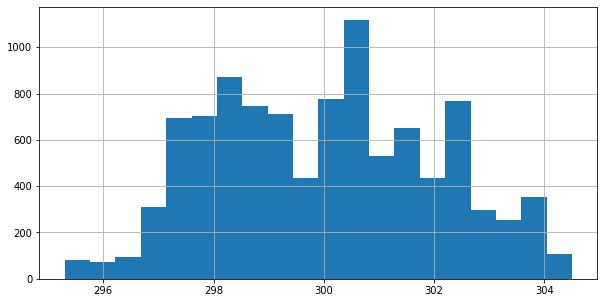

In [9]:
preMain['Air temperature [K]'].hist(bins= 20, figsize= (10,5))
plt.show()

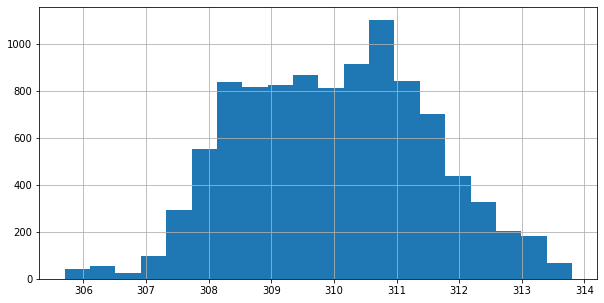

In [10]:
preMain['Process temperature [K]'].hist(bins= 20, figsize= (10,5))
plt.show()

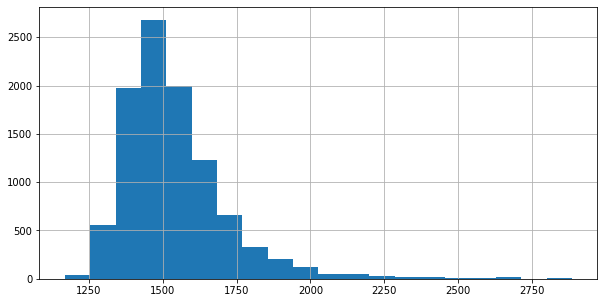

In [11]:
preMain['Rotational speed [rpm]'].hist(bins= 20, figsize= (10,5))
plt.show()

Overlaid with a normally distributed noise

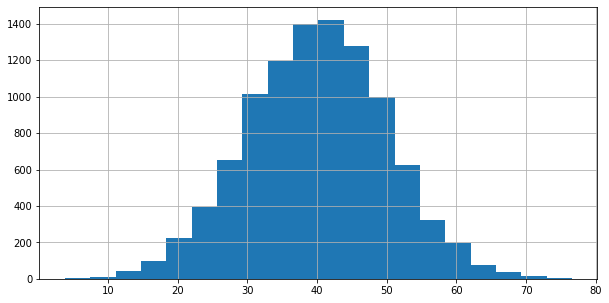

In [12]:
preMain['Torque [Nm]'].hist(bins= 20, figsize= (10,5))
plt.show()

Right this is Normally distributed

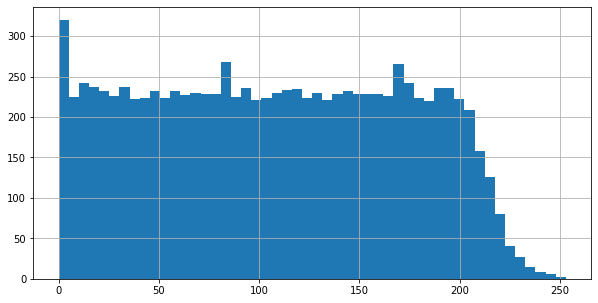

In [13]:
preMain['Tool wear [min]'].hist(bins= 50, figsize= (10,5))
plt.show()

## Look at some Relationships(for failure modes)

## TWF

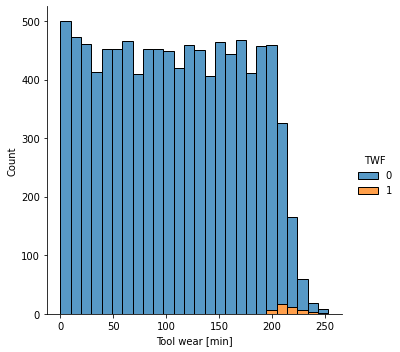

In [14]:

sea.displot(preMain, x ="Tool wear [min]", hue= 'TWF', multiple="stack");

If Tool wear [min] between 200 – 240, **TWF** replace or fail

## HDF

In [15]:
preMain['diffTemp'] = preMain['Air temperature [K]'] - preMain['Process temperature [K]']

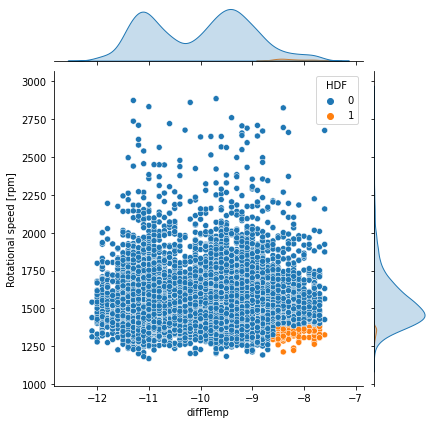

In [16]:
sea.jointplot(data=preMain, x="diffTemp", y="Rotational speed [rpm]", hue='HDF');

If the difference between air-and process temperature is below 8.6 K and the tool’s rotational speed is below 1380 rpm, **HDF** occurs

## PWF

In [17]:
preMain['TorqRot'] = preMain['Torque [Nm]'] * preMain['Rotational speed [rpm]']

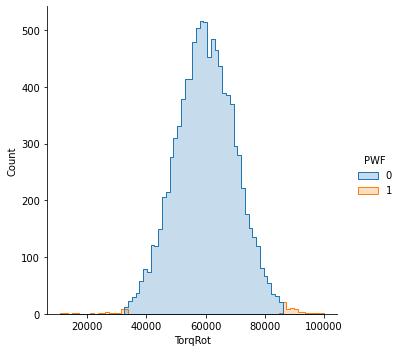

In [18]:
sea.displot(preMain, x= 'TorqRot', hue= 'PWF', element="step");

If the power Torque [Nm] * Rotational speed [rpm] is below 3500 W or above 9000 W **PWF** occurs

## OSF

In [19]:
preMain['toolTorq'] = preMain['Torque [Nm]'] * preMain['Tool wear [min]']

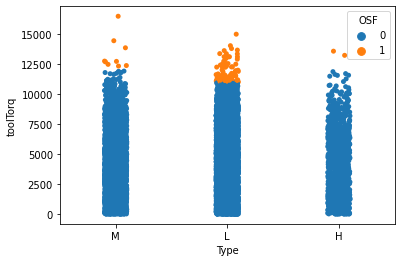

In [20]:
sea.stripplot(y="toolTorq", x= 'Type', hue="OSF", data = preMain);

If the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 for M, 13,000 for H) **OSF** occurs

## RNF
more frequent than could be expected for 10,000 datapoints in our dataset.

### Clean last 3 columns we are added for visualization

In [21]:
preMain.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,diffTemp,TorqRot,toolTorq
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,-10.5,66382.8,0.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,-10.5,65190.4,138.9
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,-10.4,74001.2,247.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,-10.4,56603.5,276.5
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,-10.5,56320.0,360.0


In [22]:
preMain.drop(preMain.columns[14:], axis=1, inplace=True)
preMain.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Some Explanations from our analysis :
- **Product ID** *product quality* variants and a variant-specific serial number
- **Type** Product Quality [L, M, H]
- **Air temperature [K]**  normalized to a standard deviation of 2 K around 300 K
- **Process temperature [K]** normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- **Rotational speed [rpm]** calculated from a power of 2860 W, overlaid with a normally distributed noise
- **Torque [Nm]** normally distributed around 40 Nm with a σ = 10 Nm and *no negative values*
- **Tool wear [min]** The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
- **Machine failure** indicates whether the machine has failed in this particular datapoint, consists of five independent failure modes:
- **TWF** (tool wear failure): the tool will be replaced or fail at a randomly selected tool wear time between 200 – 240 mins (**120** times in our dataset). At this point in time, the tool is **replaced 74** times, and **fails 46** times (randomly assigned).
- **HDF** (heat dissipation failure) heat dissipation causes a process failure, if the difference between air-and process temperature is below 8.6 K and the tool’s rotational speed is below 1380 rpm. This is the case for **115** data points
- **PWF** (power failure) the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case **95** times in our dataset.
- **OSF** (overstrain failure) if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 for M, 13,000 for H), the process fails due to overstrain. This is true for **98** datapoints
- **RNF** (random failure) each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for **19** datapoints, more frequent than *could be expected* for 10,000 datapoints in our dataset.

## Data Preparation

In [23]:
y = preMain['Machine failure']
x = preMain.drop(['Machine failure'], axis = 1)

varCats = preMain['Type']
varNums = preMain[['Air temperature [K]', 'Process temperature [K]', 
                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]


### Normalization operation for numerical stability

In [24]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x  = std.fit_transform(varNums)

In [25]:
from sklearn.preprocessing import OrdinalEncoder
enco = OrdinalEncoder()
preMain['Type']= enco.fit_transform(preMain['Type'].values.reshape(-1, 1))

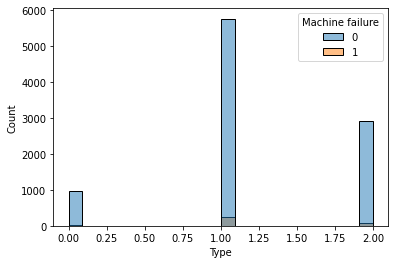

In [26]:
preMain['Type'].unique()
sea.histplot(x="Type", hue="Machine failure", data=preMain);

### Now: L(Low) = 1, M(Medium) = 2, H(High) = 0

In [27]:
# Split our data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=84)

In [28]:
X_test

array([[-0.50242514, -0.94735989,  0.68176718, -0.7811567 , -0.03065154],
       [ 1.74739637,  1.54647288,  0.47538049, -0.52033342,  0.20500868],
       [ 1.89738447,  2.15308085, -0.04337523, -0.05887684,  0.80201456],
       ...,
       [-0.60241721, -0.94735989, -0.29438606,  0.19191477, -0.25060108],
       [ 1.74739637,  1.20946845, -0.48961671,  0.52295971,  1.0219641 ],
       [-0.65241324, -0.61035546, -0.64580123,  0.95432129,  1.44615249]])

In [29]:
X_train

array([[-8.52397376e-01, -1.48656697e+00,  2.04838171e+00,
        -1.79435483e+00, -6.20729014e-02],
       [-1.45234978e+00, -8.79959002e-01, -3.61322284e-01,
         2.32041433e-01, -6.90500149e-01],
       [ 1.19744000e+00,  1.14206757e+00,  1.01644829e+00,
        -1.31283493e+00,  6.36125481e-02],
       ...,
       [ 1.49741620e+00,  7.37662252e-01, -2.72073988e-01,
         3.02263085e-01,  7.69823378e-04],
       [ 6.47483633e-01,  4.00657824e-01, -6.29067172e-01,
         7.15347977e-02, -8.47606960e-01],
       [ 4.47499498e-01,  6.02860481e-01,  5.42316713e-01,
        -4.70175095e-01,  7.07750477e-01]])

## Modeling

In [30]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression() 
logReg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Make predictions 
pred = logReg.predict(X_test)

###  Calculate the accuracy score by comparing the actual values and predicted values.

In [32]:
from sklearn.metrics import confusion_matrix
cnfMax = confusion_matrix(y_test, pred)

TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)

print('Accuracy of binary classification = {:0.3f}'.format(accuracy))

True Positive(TP) =  26
False Positive(FP) =  7
True Negative(TN) =  3175
False Negative(FN) =  92
Accuracy of binary classification = 0.970
